In [1]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import seaborn as sns
import numpy as np
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [3]:
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

In [4]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    print('File Path : ',filepath)
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [5]:
# load all train
X_train, Y_train = load_dataset_group('train', 'UCIDataset/')
# load all test
X_test, Y_test = load_dataset_group('test', 'UCIDataset/')

# zero-offset class values
Y_train = Y_train - 1
Y_test = Y_test - 1
# one hot encode y
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('X_train.shape : ', X_train.shape)
print('Y_train.shape : ', Y_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_test.shape : ', Y_test.shape)

File Path :  UCIDataset/train/Inertial Signals/
File Path :  UCIDataset/test/Inertial Signals/
X_train.shape :  (7352, 128, 9)
Y_train.shape :  (7352, 6)
X_test.shape :  (2947, 128, 9)
Y_test.shape :  (2947, 6)


In [6]:
verbose = 1
epochs = 50
batch_size = 20

n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = Y_train.shape[1]

In [7]:
checkpoint = ModelCheckpoint("har_weights.h5", monitor='val_acc', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=epochs, batch_size=batch_size, callbacks = [checkpoint], verbose=verbose)


# evaluate model
(loss, accuracy) = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=verbose)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))


Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 21s 3ms/step - loss: 0.3432 - acc: 0.8584 - val_loss: 0.3734 - val_acc: 0.8700

Epoch 00001: val_acc improved from -inf to 0.87004, saving model to har_weights.h5
Epoch 2/50
7352/7352 [==============================] - 19s 3ms/step - loss: 0.1356 - acc: 0.9455 - val_loss: 0.2879 - val_acc: 0.9043

Epoch 00002: val_acc improved from 0.87004 to 0.90431, saving model to har_weights.h5
Epoch 3/50
7352/7352 [==============================] - 18s 2ms/step - loss: 0.1153 - acc: 0.9510 - val_loss: 0.4297 - val_acc: 0.8792

Epoch 00003: val_acc did not improve from 0.90431
Epoch 4/50
7352/7352 [==============================] - 18s 3ms/step - loss: 0.1524 - acc: 0.9426 - val_loss: 0.4008 - val_acc: 0.8907

Epoch 00004: val_acc did not improve from 0.90431
Epoch 5/50
7352/7352 [==============================] - 18s 2ms/step - loss: 0.1072 - acc: 0.9528 - val_loss: 0.3591 - val_acc: 0.8965

Epo

7352/7352 [==============================] - 20s 3ms/step - loss: 0.0426 - acc: 0.9927 - val_loss: 0.6540 - val_acc: 0.9209

Epoch 00044: val_acc did not improve from 0.92840
Epoch 45/50
7352/7352 [==============================] - 21s 3ms/step - loss: 0.0487 - acc: 0.9901 - val_loss: 0.6413 - val_acc: 0.9226

Epoch 00045: val_acc did not improve from 0.92840
Epoch 46/50
7352/7352 [==============================] - 17s 2ms/step - loss: 0.0391 - acc: 0.9936 - val_loss: 0.6354 - val_acc: 0.9172

Epoch 00046: val_acc did not improve from 0.92840
Epoch 47/50
7352/7352 [==============================] - 18s 2ms/step - loss: 0.0418 - acc: 0.9922 - val_loss: 0.7178 - val_acc: 0.9165

Epoch 00047: val_acc did not improve from 0.92840
Epoch 48/50
7352/7352 [==============================] - 13s 2ms/step - loss: 0.1179 - acc: 0.9795 - val_loss: 0.6182 - val_acc: 0.9270

Epoch 00048: val_acc did not improve from 0.92840
Epoch 49/50
7352/7352 [==============================] - 13s 2ms/step - loss:

In [9]:
scores = model.evaluate(X_test, Y_test, batch_size = batch_size, verbose = verbose)
print("HAR - 1D CNN Test Accuracy: %.2f%%" % (scores[1]*100))

2947/2947 [==============================] - 2s 712us/step
HAR - 1D CNN Test Accuracy: 91.96%


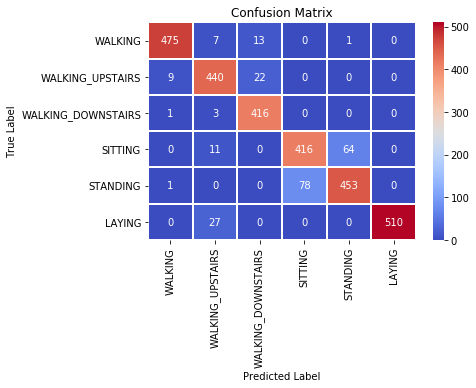

In [10]:

# Print confusion matrix for training data
y_pred_train = model.predict(X_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#print(classification_report(trainy, max_y_pred_train))

# confusion matrix
LABELS = ['WALKING',
          'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING']
y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(Y_test, axis=1)

matrix = metrics.confusion_matrix(max_y_test, max_y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=LABELS,
            yticklabels=LABELS,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
